# Variation temps

Liste des points : [(250.0, 250.0), (479, 149), (88, 493), (7, 314), (347, 489), (124, 191), (98, 429), (344, 61), (392, 386), (297, 151), (383, 96)]
Matrice d'adjacence 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]
Matrice d'adjacence pondérée 
 [[  0. 250.   0.   0.   0.   0.   0.   0.   0. 110. 203.]
 [250.   0. 521.   0.   0.   0.   0. 161.   0.   0.   0.]
 [  0. 521.   0. 196.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 196.   0. 382.   0.   0.   0. 392.   0.   0.]
 [  0.   0.   0. 382.   0. 372.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 372.   0. 239.   0.   0.   0. 276.]
 [  0.   0.   0.   0.   0. 239.   0. 443.   0.   0. 

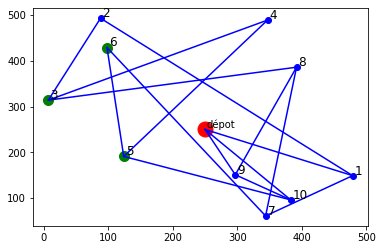

In [6]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 50*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    
    for i in range(len(matrix)):
        matrix[i][(i+1)%(len(matrix))] = 1
        matrix[(i+1)%(len(matrix))][i] = 1
    
    for i in range(len(matrix)):
        
        if i < len(matrix):
        
            nbchoisi = 0
            while(sum(matrix[i])<linksLimit and matrix[:, i].sum() < linksLimit):
                nbchoisi = np.random.randint(i,len(matrix))
                
                if (matrix[:, nbchoisi].sum() < linksLimit and sum(matrix[nbchoisi])<linksLimit):
                    matrix[i][nbchoisi] = 1
                    matrix[nbchoisi][i] = 1

            
                    
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = round(poids)
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 10
nbvoisins = 3
nbPackages = 3

pointList = pointGeneration(nbPoints)
print("Liste des points :", pointList)
plotPoints(pointList)
package = randomPackages(nbPackages, nbPoints)
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)


## solution aleatoire

In [7]:
def generateSolution(matrix,package):

    packageLeft = package.copy()
    solution = [0]

    #print("Package : ", packageLeft)

    while(packageLeft):
        randomNext = np.random.randint(0,len(matrix))
        while( matrix[solution[-1]][randomNext] == 0 ):
            randomNext = np.random.randint(0,len(matrix))
        solution.append(randomNext)
        if(randomNext in packageLeft):
            packageLeft.remove(randomNext)
    #print("Solution : ",solution)

    return solution


def solutionLength(solution):

    totalLength = 0
    for i in range(0,len(solution)-1):
        totalLength += matrix[solution[i]][solution[i+1]]

    return totalLength


UniqueRandomSolution = generateSolution(matrix, package)
print(UniqueRandomSolution)

[0, 10, 9, 0, 9, 8, 9, 8, 7, 1, 7, 1, 7, 1, 0, 1, 7, 8, 9, 10, 5, 6, 7, 1, 2, 1, 0, 1, 7, 6, 7, 6, 7, 6, 7, 8, 9, 8, 7, 6, 5, 6, 7, 6, 5, 10, 0, 1, 7, 6, 7, 8, 7, 6, 7, 6, 7, 8, 7, 8, 9, 0, 1, 7, 1, 2, 3]


# Instance

In [26]:
def variationTraficTemps(solution, matrix):
    speed = 500
    startTime = 8
    currentTime = startTime
    totalDays = 0
    
    dict_speed_reduction_by_time = {8:0.5, 9:0.5, 10:0.6, 11:0.8, 12:0.6, 13:0.6, 14:0.8, 15:0.9, 16:0.7, 17:0.4, 18:0.5}
    #------------------------------------------------------------------------------------------------------------------------------------------------
    for p in range(0,len(solution)-1):
        print("iteration")
        print(currentTime)
        time2points = int((speed* dict_speed_reduction_by_time[currentTime]) / matrix[solution[p]][solution[p+1]])
        currentTime += time2points
        if ((18 - currentTime) < time2points):
            totalDays +=1
            currentTime = 8
        
    return([totalDays, currentTime])

print(variationTraficTemps(UniqueRandomSolution,matrix))

iteration
8
iteration
9
iteration
11
iteration
14
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
9
iteration
10
iteration
11
iteration
13
iteration
14
iteration
15
iteration
16
iteration
8
iteration
8
iteration
8
iteration
10
iteration
11
iteration
12
iteration
12
iteration
13
iteration
13
iteration
13
iteration
14
iteration
15
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
8
iteration
9
iteration
10
iteration
10
iteration
10
iteration
11
iteration
12
iteration
13
iteration
14
iteration
16
iteration
16
iteration
16
iteration
17
iteration
17
iteration
17
iteration
17
iteration
17
iteration
17
iteration
17
iteration
17
iteration
17
iteration
17
iteration
8
iteration
9
iteration
10
iteration
11
iteration
11
[4, 13]
